In [6]:
# Using Google Colab - Mounting Files via G-Drive
from google.colab import drive
drive.mount('/content/drive')

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
file_path = ('/content/drive/My Drive/Data Analyst/Projects/Raw Data/Perfume E-Commerce Dataset 2024.csv')

# reading data
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Checking data info
df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [9]:
df.tail()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
995,GUESS,Guess 1981 by Guess cologne for men EDT 3.3 / ...,Eau de Toilette,20.28,US $20.28/ea,45.0,"45 available / 1,613 sold",1613.0,"May 24, 2024 08:14:07 PDT","Dallas, Texas, United States"
996,Armaf,Club de Nuit Intense by Armaf cologne for men ...,Eau de Toilette,30.58,US $30.58,10.0,More than 10 available / 31 sold,31.0,"May 23, 2024 08:39:30 PDT",United States
997,Paco Rabanne,Invictus by Paco Rabanne for Men EDT Spray 3.4...,Eau de Toilette,39.99,US $39.99/ea,2.0,2 available / 305 sold,305.0,"May 23, 2024 15:27:18 PDT","Jamaica, New York, United States"
998,Lomani,"Lomani EDT Cologne 3.4 oz Men - Authentic, Bra...",Eau de Toilette,9.99,US $9.99/ea,2.0,2 available / 22 sold,22.0,"May 20, 2024 13:20:54 PDT","Lincoln Park, Michigan, United States"
999,Estee Lauder,Beyond Paradise by Estee Lauder for Men Cologn...,Cologne spray,17.49,US $17.49/ea,10.0,More than 10 available / 24 sold,24.0,"Feb 28, 2024 07:27:01 PST","Keyport, New Jersey, United States"


In [8]:
# Checking data & null values aloon with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.2+ KB


In [17]:
# checking descriptive statistics oof data
df.describe()

,price,available,sold,lastUpdated
count,947.000000,947.000000,947.000000,947
mean,46.484794,18.411827,803.914467,2024-05-15 21:31:59.559662336
min,3.000000,0.000000,1.000000,2022-10-20 18:26:14
25%,22.995000,3.000000,16.000000,2024-05-18 08:30:40.500000
50%,35.990000,8.000000,59.000000,2024-05-22 16:32:56
75%,59.530000,10.000000,360.500000,2024-05-24 00:01:38.500000
max,259.090000,842.000000,54052.000000,2024-05-24 10:27:08
std,34.962171,59.904746,3274.945950,NaN


In [10]:
# Checking null values
df.isnull().sum()

,0
brand,1
title,0
type,3
price,0
priceWithCurrency,0
available,111
availableText,3
sold,6
lastUpdated,53
itemLocation,0


In [13]:
# Cleaning the data
df['brand'].fillna('unknown', inplace=True)
df['type'].fillna('unknown', inplace=True)
df['availableText'].fillna('unknown', inplace=True)

df['available'].fillna(0, inplace=True)
df['sold'].fillna(0, inplace=True)

df.dropna(subset=['lastUpdated'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              947 non-null    object 
 1   title              947 non-null    object 
 2   type               947 non-null    object 
 3   price              947 non-null    float64
 4   priceWithCurrency  947 non-null    object 
 5   available          947 non-null    float64
 6   availableText      947 non-null    object 
 7   sold               947 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       947 non-null    object 
dtypes: float64(3), object(7)
memory usage: 81.4+ KB


In [16]:
# Converting lastUpdated to datetime
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   brand              947 non-null    object        
 1   title              947 non-null    object        
 2   type               947 non-null    object        
 3   price              947 non-null    float64       
 4   priceWithCurrency  947 non-null    object        
 5   available          947 non-null    float64       
 6   availableText      947 non-null    object        
 7   sold               947 non-null    float64       
 8   lastUpdated        947 non-null    datetime64[ns]
 9   itemLocation       947 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 81.4+ KB


**KPI**

In [20]:
# KPI 1: Total Sales Revenue
total_sales_revenue = np.sum(df['price'] * df['sold'])
formatted_revenue = "{:.2f}".format(total_sales_revenue)
print("Total Sales Revenue:", formatted_revenue)


Total Sales Revenue: 25798324.44


In [24]:
# KPI 2: Average Selling Price (ASP)
average_selling_price = np.mean(df['price'])
formatted_asp = "{:.2f}".format(average_selling_price)
print("Average Selling Price:", formatted_asp)

Average Selling Price: 46.48


In [26]:
# KPI 3: Units Sold
total_units_sold = np.sum(df['sold'])
print("Total Units Sold:", total_units_sold)

Total Units Sold: 761307.0


In [28]:
# KPI 4: Sales Conversion Rate
sales_conversion_rate = (np.sum(df['sold']) / np.sum(df['available'])) * 100
formatted_scr = "{:.2f}".format(sales_conversion_rate)
print("Sales Conversion Rate:", formatted_scr)

Sales Conversion Rate: 4366.29


In [32]:
# KPI 5: Top Selling Products (by units sold)
top_selling_products = df[['title', 'sold']].sort_values(by='sold', ascending=False).head(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
                                                 title     sold
81   Ck One by Calvin Klein Cologne Perfume Unisex ...  54052.0
642  Cool Water by Davidoff 4.2 oz EDT Cologne for ...  40130.0
184  Versace Eros by Gianni Versace 3.4 oz EDT Colo...  31718.0
44   Chrome by Azzaro 6.7 / 6.8 oz EDT Cologne for ...  30655.0
76   OBSESSION by Calvin Klein 4.0 oz 4 MEN edt Col...  24048.0
188  Versace Pour Homme Signature by Versace 3.4 oz...  21310.0
57   Versace Pour Homme Signature by Versace 3.4 oz...  19899.0
61   6 For $19.95 MEN(M) WOMEN(W) & UNISEX(U) Body ...  18882.0
163  Cool Water by Davidoff Cologne for Men 6.7 / 6...  13549.0
58   KENNETH COLE BLACK Cologne for Men 3.4 oz EDT ...  12865.0


In [33]:
# KPI 6: Stock Turnover Rate (Units Sold / Total Units Available)
stock_turnover_rate = (np.sum(df['sold']) / np.sum(df['available'])) * 100
formatted_str = "{:.2f}".format(stock_turnover_rate)
print("Stock Turnover Rate:", formatted_str)

Stock Turnover Rate: 4366.29


In [38]:
# KPI 7: Out-of-Stock Rate

# Out-of-Stock
out_of_stock_rate = np.sum(df['available'] == 0)
formatted_out_stock = "{:.2f}".format(out_of_stock_rate)
print("Out-of-Stock:", formatted_out_stock)

# Out-of-Stock Rate
print("Total count:", len(df))
out_of_stock_rate = (np.sum(df['available'] == 0) / len(df)) * 100
formatted_oor = "{:.2f}".format(out_of_stock_rate)
print("Out-of-Stock Rate:", formatted_oor)


Out-of-Stock: 103.00
Total count: 947
Out-of-Stock Rate: 10.88


In [41]:
# KPI 8: Sales Over Time (grouped by day)
sales_over_time = df.groupby(df['lastUpdated'].dt.date)['sold'].sum()
print("Sales Over Time:")
print(sales_over_time.head(5))

Sales Over Time:
lastUpdated
2022-10-20     45.0
2022-11-02     75.0
2023-09-15     69.0
2023-11-12      1.0
2023-11-21    331.0
Name: sold, dtype: float64


In [69]:
# KPI 9: Sales by Location

# Displaying after white space removed and sorting
sales_by_location = df.groupby(df['itemLocation'].str.strip())['sold'].sum().sort_values(ascending=False).head(10)

# Displaying the sales by location
print("Sales by Location:")
print(sales_by_location)

Sales by Location:
itemLocation
Hackensack, New Jersey, United States    422755.0
Dallas, Texas, United States             221709.0
LaGrange, Georgia, United States          18882.0
Houston, Texas, United States             13551.0
Katy, Texas, United States                 9071.0
Brooklyn, New York, United States          5759.0
Edison, New Jersey, United States          5727.0
Pearland, Texas, United States             5619.0
Miami, Florida, United States              5446.0
Detroit, Michigan, United States           4957.0
Name: sold, dtype: float64


In [71]:
# KPI 10: Revenue per Brand
revenue_per_brand = df.groupby('brand')['price'].sum().sort_values(ascending=False).head(10)
print("Revenue per Brand:")
print(revenue_per_brand)

Revenue per Brand:
brand
Giorgio Armani        3325.43
Paco Rabanne          2359.99
Yves Saint Laurent    2062.84
Dolce&Gabbana         1799.20
Ralph Lauren          1528.32
Armaf                 1196.23
Creed                 1117.23
Unbranded              957.94
Dior                   871.84
Carolina Herrera       844.03
Name: price, dtype: float64


In [52]:
# Displaying all the calculated KPIs
kpi_results = {
    "Total Sales Revenue (USD):": formatted_revenue,
    "Average Selling Price (USD):": formatted_asp,
    "Total Units Sold (USD):": total_units_sold,
    "Sales Conversion Rate (%):": formatted_scr,
    "Stock Turnover Rate (%):": formatted_str,
    "Out-of-Stock Rate (%):": formatted_oor,
    "Top Selling Products (by units sold):": top_selling_products,
    "Sales Over Time (first 5 days):": sales_over_time.head(5),
    "Top 10 Sales by Location:": sales_by_location.head(10),
    "Top 10 Revenue per Brand:": revenue_per_brand.head(10)
}

kpi_results

{'Total Sales Revenue (USD):': '25798324.44',
 'Average Selling Price (USD):': '46.48',
 'Total Units Sold (USD):': 761307.0,
 'Sales Conversion Rate (%):': '4366.29',
 'Stock Turnover Rate (%):': '4366.29',
 'Out-of-Stock Rate (%):': '10.88',
 'Top Selling Products (by units sold):':                                                  title     sold
 81   Ck One by Calvin Klein Cologne Perfume Unisex ...  54052.0
 642  Cool Water by Davidoff 4.2 oz EDT Cologne for ...  40130.0
 184  Versace Eros by Gianni Versace 3.4 oz EDT Colo...  31718.0
 44   Chrome by Azzaro 6.7 / 6.8 oz EDT Cologne for ...  30655.0
 76   OBSESSION by Calvin Klein 4.0 oz 4 MEN edt Col...  24048.0
 188  Versace Pour Homme Signature by Versace 3.4 oz...  21310.0
 57   Versace Pour Homme Signature by Versace 3.4 oz...  19899.0
 61   6 For $19.95 MEN(M) WOMEN(W) & UNISEX(U) Body ...  18882.0
 163  Cool Water by Davidoff Cologne for Men 6.7 / 6...  13549.0
 58   KENNETH COLE BLACK Cologne for Men 3.4 oz EDT ...  12865.0,

**Data Visulization**

<ipython-input-58-68aae4d560d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sold', y='title', data= top_selling_products, palette='Blues_d')


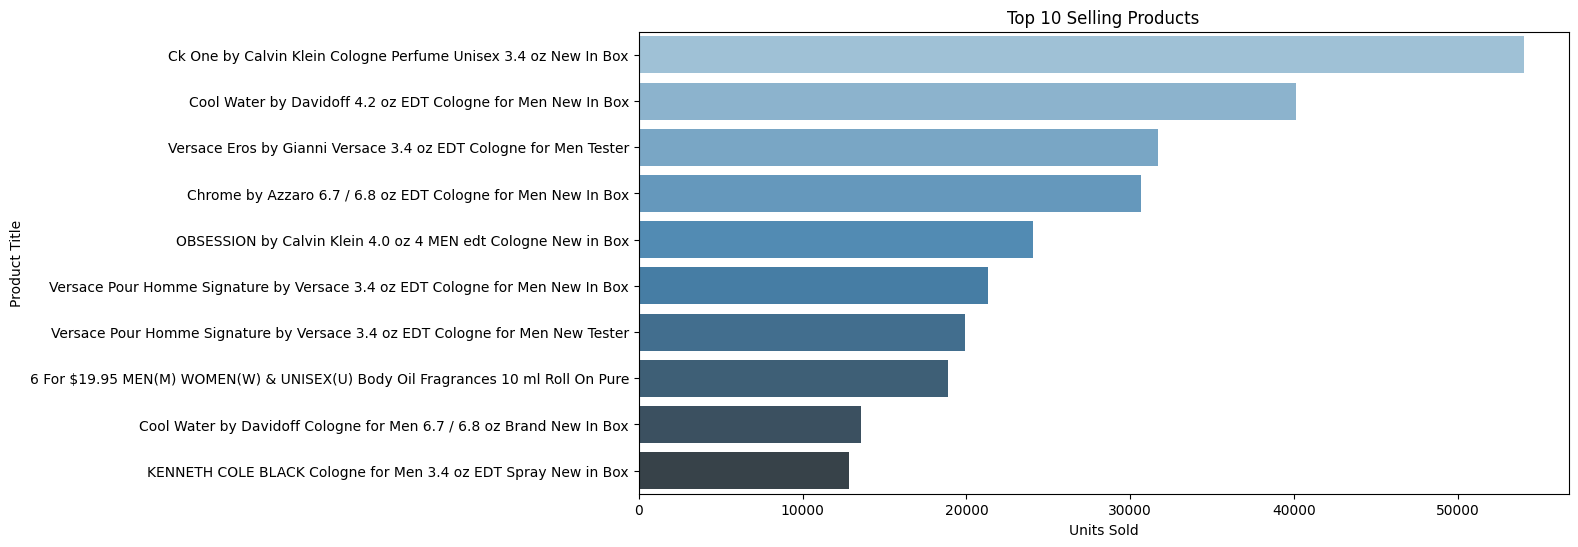

In [58]:
# Visualization 1: Total Sales by Top Products
plt.figure(figsize=(12, 6))
sns.barplot(x='sold', y='title', data= top_selling_products, palette='Blues_d')
plt.title("Top 10 Selling Products")
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.show()

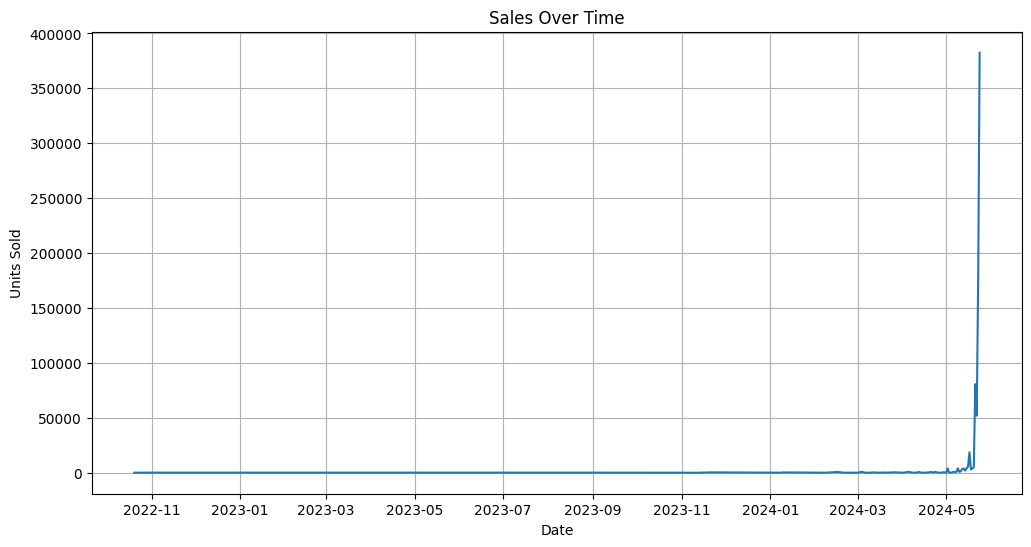

In [64]:
# Visualization 2: Sales Over Time
plt.figure(figsize=(12,6))
sales_over_time.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

<ipython-input-73-975c8925bbf4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette='Greens_d')


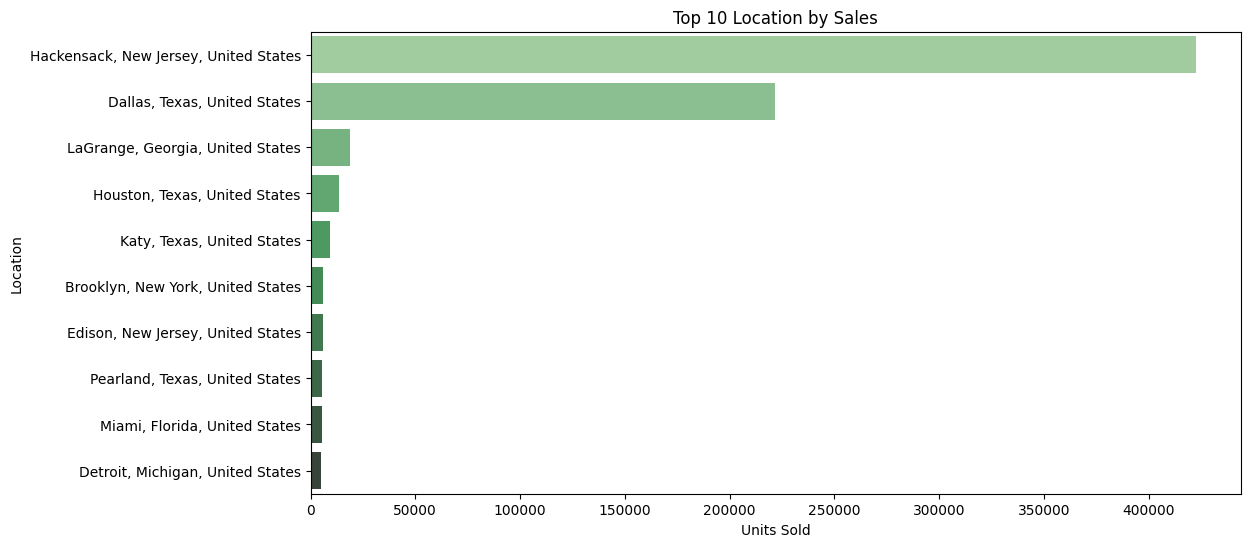

In [73]:
# Visualization 3: Sales by Location
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette='Greens_d')
plt.title('Top 10 Location by Sales')
plt.xlabel('Units Sold')
plt.ylabel('Location')
plt.show()

<ipython-input-77-e522e56e5f71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_brand.values,y=revenue_per_brand.index,palette='Oranges_d')


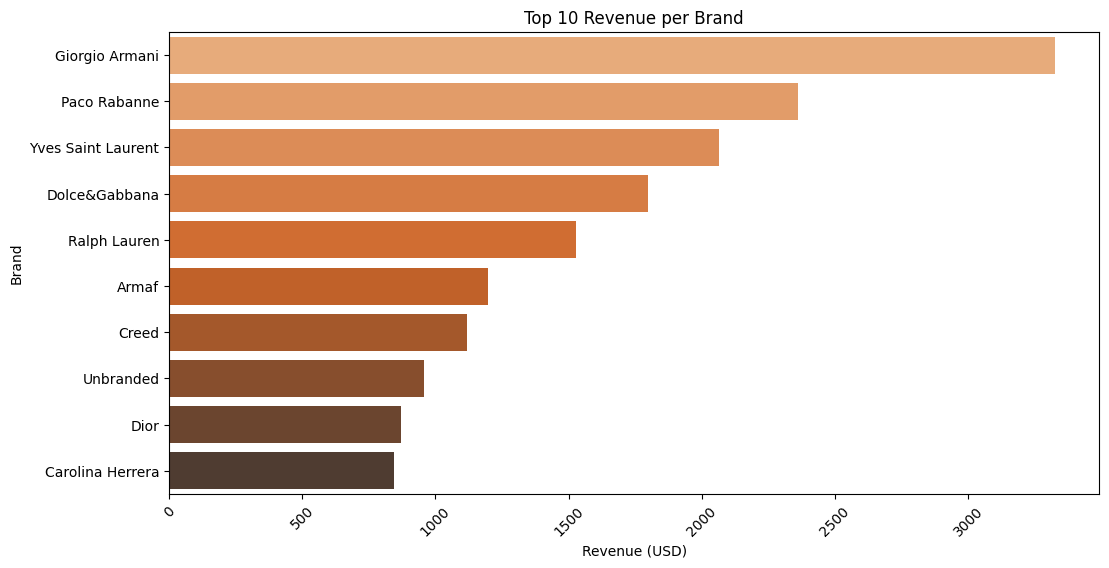

In [77]:
# Visualization 4: Revenue per Brand
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_per_brand.values,y=revenue_per_brand.index,palette='Oranges_d')
plt.title('Top 10 Revenue per Brand')
plt.xlabel('Revenue (USD)')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.show()
